In [1]:
from pathlib import Path
import os

def all_samples():
    samples_path = Path().resolve().parent.joinpath("samples")
    return list(map(lambda x: samples_path.joinpath(x), os.listdir(samples_path)))
    

<Figure size 432x288 with 0 Axes>

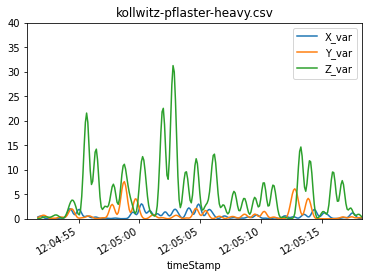

<Figure size 432x288 with 0 Axes>

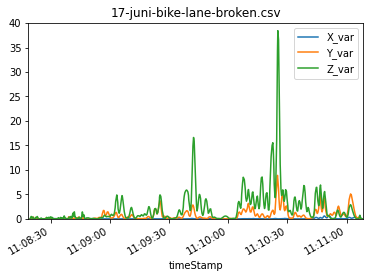

<Figure size 432x288 with 0 Axes>

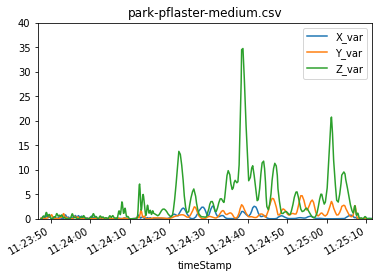

<Figure size 432x288 with 0 Axes>

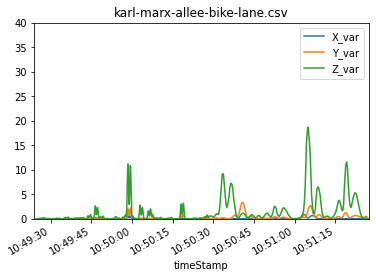

<Figure size 432x288 with 0 Axes>

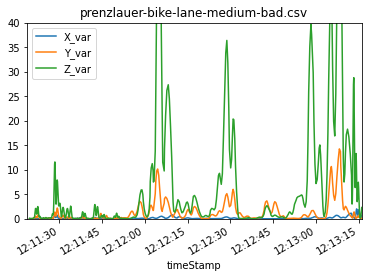

<Figure size 432x288 with 0 Axes>

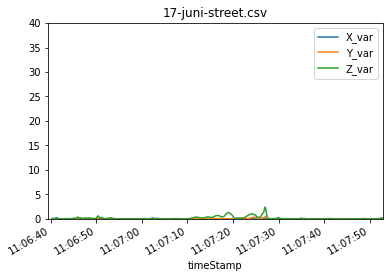

<Figure size 432x288 with 0 Axes>

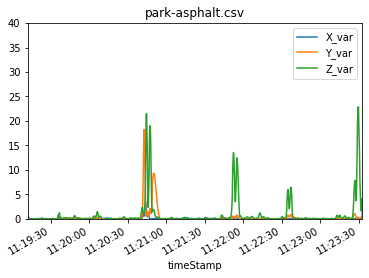

<Figure size 432x288 with 0 Axes>

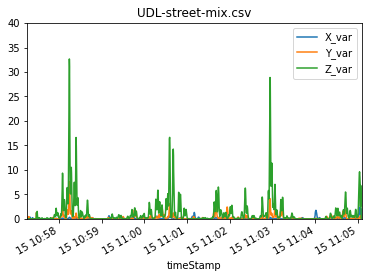

<Figure size 432x288 with 0 Axes>

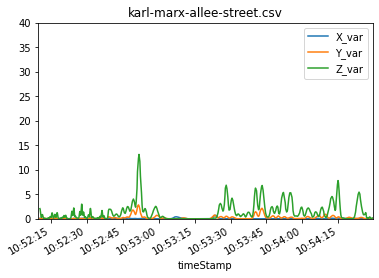

<Figure size 432x288 with 0 Axes>

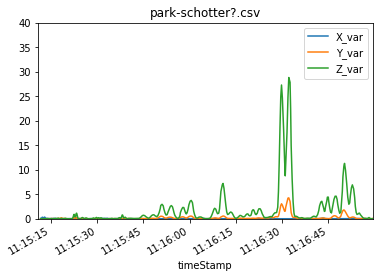

In [2]:
%matplotlib inline
from simrakit.RideParser import Ride
from SignalUtility import *
import pandas as pd
import matplotlib.pyplot as plt

samples = all_samples()

def plot(ride):
    df = ride.ride_df
    x = df.index.values
    fig = plt.figure()

    fs = ride.frequency_for_column("X")
    df = ride.ride_df
    x = df.index.values

    cut_off = 1

    df["X_low"] = low_pass_filter(values=df.X, fs=fs, cut_off=cut_off)
    df["Y_low"] = low_pass_filter(values=df.Y, fs=fs, cut_off=cut_off)
    df["Z_low"] = low_pass_filter(values=df.Z, fs=fs, cut_off=cut_off)
    
    df[["X_var", "Y_var", "Z_var"]] = df[["X_low", "Y_low", "Z_low"]].rolling(window=10).var()
    ax = df[["X_var", "Y_var", "Z_var"]].plot(title=ride.title)
    #df[["X","Y", "Z"]].rolling(window=10).var().plot(ax=ax)

    ax.set_ylim(0,40)
    return plt.show()


for sample in all_samples():
    ride = Ride.from_file(sample)
    plot(ride)